Problem Statement:

*To predict the approximate insurance cost based upon the rest of the features provided for each individual.*
---
---

Consider the data present in the Insurance dataset file.
Following is the attribute related information:
* **age**: age of primary beneficiary
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking, yes or no
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance


Create X and Y

Import Requirement Packages

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

Read CSV

In [3]:
data = pd.read_csv('/content/drive/datasets_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

In [4]:
data.size

9366

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Making copy of original DataFrame
original_data = data
original_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Preprocessing [Data Cleaning]

In [8]:
data.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
# data = data.fillna(value = data.mean(), method = None, inplace = False )
# data

Converting Categorical Data
1. Sex: Female - 0, Male - 1
2. Smoker: No - 0, Yes - 1
3. Region: northeast - 0, northwest - 1, southeast - 2, southwest - 3

In [10]:

data['sex'].replace(['female', 'male'], [0, 1], inplace=True)
data['smoker'].replace(['no', 'yes'], [0, 1],  inplace=True)
data['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0, 1, 2, 3], inplace = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Creating X and Y

In [11]:
x = data.drop(columns = 'charges')
y = data['charges']


Assumptions and Checking
* Linearity - Log Transformation, Sqrt Transformation
* Normility - Shapiro-Wilk Test
* No Perfect Multicolinearity - Correlation

---

1. Assumption - Linearity

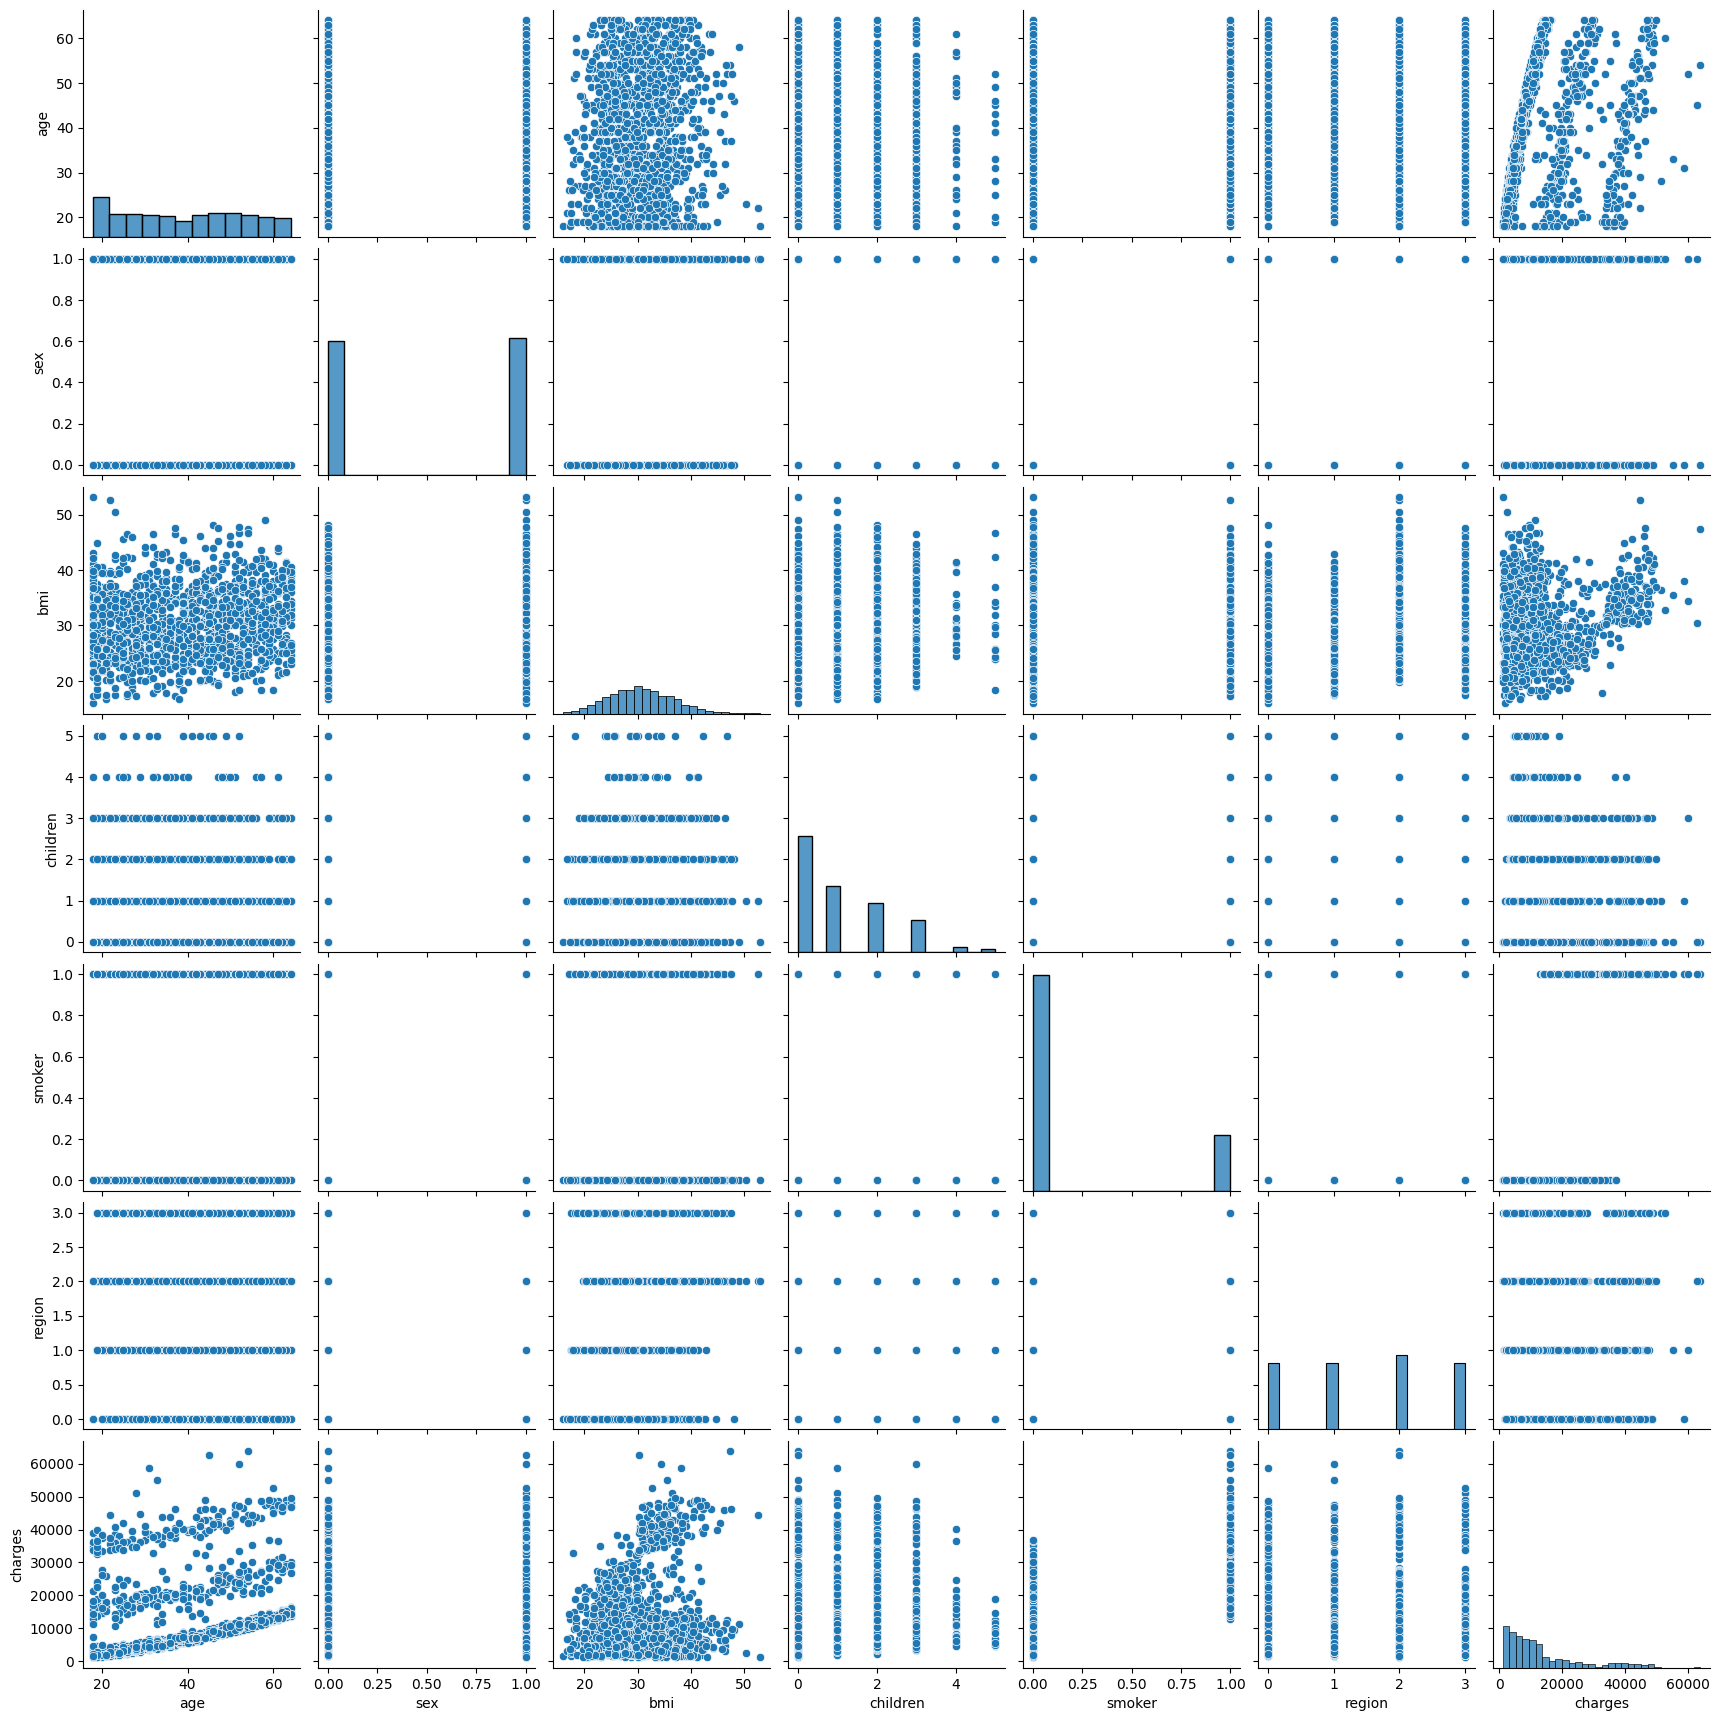

In [12]:
allpair = sns.pairplot(data = data, kind = 'scatter')

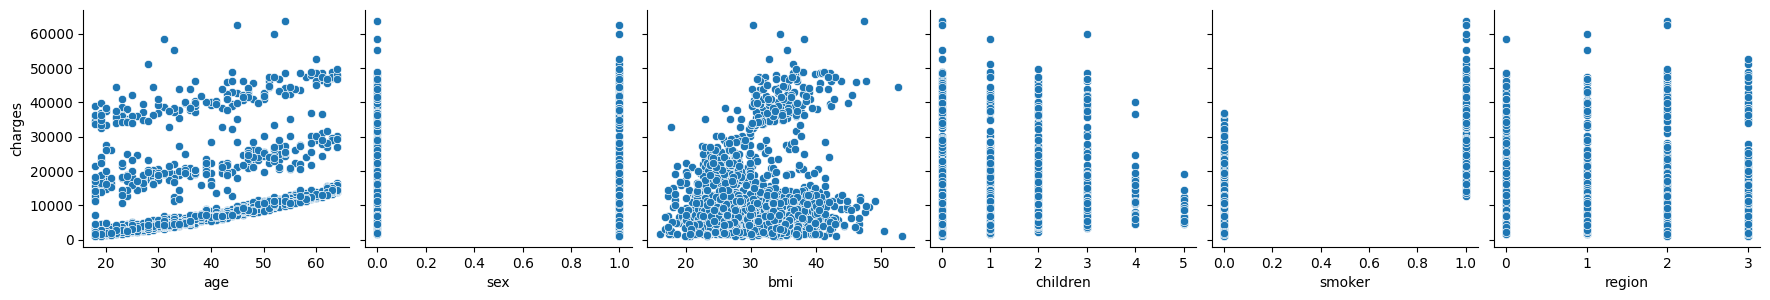

In [13]:
pair = sns.pairplot(data = data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker','region'], y_vars=['charges'], kind = 'scatter', height = 3)

2. Assumption - Normility


<Axes: xlabel='charges', ylabel='Count'>

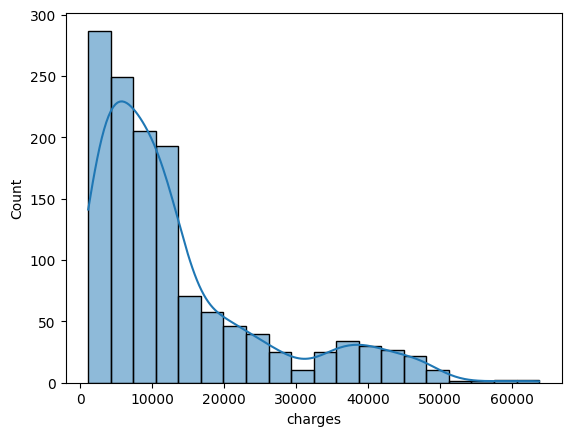

In [14]:
sns.histplot(data = y, bins = 20, kde = True)

<Axes: xlabel='charges', ylabel='Count'>

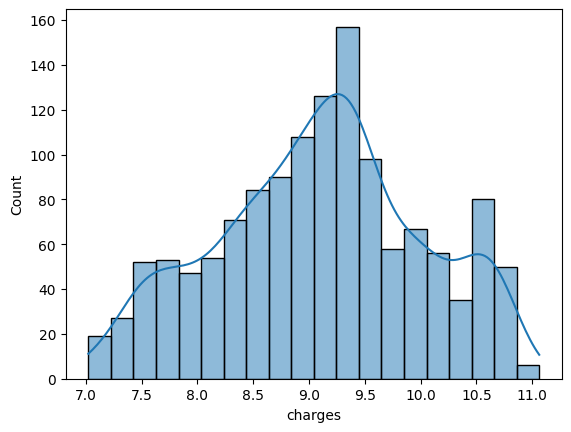

In [15]:
# Addressing skewness of data
transformed_y = np.log(y)
sns.histplot(data = transformed_y, bins = 20, kde = True) 

In [16]:
# Checking Normility of Dependent Variable by:
    # Shapiro - Wilk Test 
stat, p_value = shapiro(x)
print(f'Stats: {stat:.3f}, P_Value: {p_value:.3f}')

Stats: 0.718, P_Value: 0.000


3. Assumption - No Perfect Multicolinearity

In [17]:
corr = data.corr(method='pearson')
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

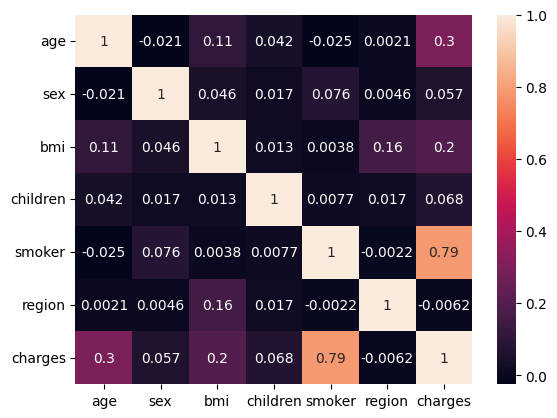

In [18]:
# Visualizing Correlation
sns.heatmap(data = corr, annot = True)

Training_Testing Models

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, transformed_y, test_size = None, random_state = 0)

In [20]:
print(f'x: {x.shape}, y:{transformed_y.shape}')
print(f'X_train: {X_train.shape}, y_train:{y_train.shape}')
print(f'X_test: {X_test.shape}, y_test:{y_test.shape}')

x: (1338, 6), y:(1338,)
X_train: (1003, 6), y_train:(1003,)
X_test: (335, 6), y_test:(335,)


Models

---

Linear Regression

In [21]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [22]:
LR.score(X_test, y_test)

0.787177869959049

In [23]:
print(f'Slope (A): {LR.coef_},\nIntercept (B): {LR.intercept_}')

Slope (A): [ 0.03476804 -0.04732497  0.01344008  0.09902518  1.5599583  -0.04681984],
Intercept (B): 6.994856606221452


In [24]:
trasposed = (LR.coef_).T
coeff = pd.DataFrame(trasposed, index = X_train.columns, columns = ['Coefficients']).sort_values('Coefficients', ascending = False)

In [54]:
# Linear Equation [y = sum (a*x(i)) + b]
charges = ''
for i in range(len(coeff['Coefficients'].values)):
    row = coeff.index[i]
    value = coeff['Coefficients'].values[i]
    charges += '['+str(row)+' * '+str(value)+'] + '
print(f'charges = {charges}')

charges = [smoker * 1.559958298941183] + [children * 0.09902517771337943] + [age * 0.03476804120218686] + [bmi * 0.013440076890214977] + [region * -0.04681983653868632] + [sex * -0.04732497317436902] + 


In [ ]:
# Predict using LR trained Model
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)
# print(f'Predict Train: {y_pred_train}, \nPredict Test: {y_pred_test} ,')

In [66]:
# Evaluate the Model
R2_Score_train = r2_score(y_train, y_pred_train)
R2_Score_test = r2_score(y_test, y_pred_test) 
print(f'R2 Train Score: {R2_Score_train}, R2 Test Score: {R2_Score_test}')


R2 Train Score: 0.7597472139019374, R2 Test Score: 0.787177869959049


Ridge and Lasso Regression.

In [79]:
scalar = StandardScaler()
Scaled_X_train = scalar.fit_transform(X_train)
Scaled_X_test = scalar.fit_transform(X_test)

train_score_LR = LR.score(Scaled_X_train, y_train)
test_score_LR = LR.score(Scaled_X_test, y_test)
print(f'Train Score: {train_score_LR}, Test Score: {test_score_LR}')

Train Score: -5.815205690234209, Test Score: -5.686855383491855


In [74]:
# Ridge Regression Model
ridgeReg = Ridge(alpha = 1.0)
ridgeReg.fit(X_train, y_train)
ridgeReg_Predict = ridgeReg.predict(X_test)
r2_lasso = r2_score(y_test, ridgeReg_Predict)
print(f'R2 Ridge Prediction:{r2_lasso}')

R2 Ridge Prediction:0.7873061728264225


In [75]:
# Lasso Regression Model
lasso = Lasso(alpha = 1.0)
lasso.fit(Scaled_X_train, y_train)
lasso_Predict = lasso.predict(X_test)
r2_lasso = r2_score(y_test, lasso_Predict)
print(f'R2 Lasso Prediction:{r2_lasso}')

R2 Lasso Prediction:-2.6110983607718907e-05


Stochastic Gradient Descent


In [ ]:
# Stochastic Gradient Descent
SGDModel = SGDRegressor(loss = 'squared_error', penalty = None)
SGDModel.fit(Scaled_X_train, y_train)
SGD_Predict = SGDModel.predict(X_test)
# print(f'SGD Prediction:{SGD_Predict}')

In [103]:
r2_SGD = r2_score(y_test, SGD_Predict)
print(f'R2 SGD Prediction:{r2_SGD}')

R2 SGD Prediction:-603.92559530774


Testing Models 

In [105]:
sample_data = {
    'age':[56, 51, 31, 64, 44, 43, 56], 
    'sex':[1, 0, 1, 1, 0, 1, 1], 
    'bmi':[19.95, 18.05, 34.39, 25.6, 23.98, 32.6, 33.725], 
    'children':[0, 0, 3, 2, 2, 2, 0],
    'smoker':[1, 0, 1, 0, 0, 0, 0],
    'region':[0, 1, 1, 3, 2, 3, 1]
}
X_test_Sample = pd.DataFrame(sample_data)


In [114]:
# LR Model
LR_Predict_Sample = LR.predict(X_test_Sample)
print(f'Prediction Value Linear Reg:{LR_Predict_Sample}') 

Prediction Value Linear Reg:[10.72262977  8.96380026 10.29775915  9.57434308  8.95135415  8.93829476
  9.3009887 ]


In [107]:
# Ridge Regression 
ridgeReg_Predict_Sample = ridgeReg.predict(X_test_Sample)
print(f'Prediction Value Ridge:{ridgeReg_Predict_Sample}')

Prediction Value Ridge:[10.7151581   8.96531747 10.29056335  9.57629526  8.95292462  8.9405071
  9.30305802]


In [108]:
# Lasso Regression
lasso_Predict_Sample = lasso.predict(X_test_Sample)
print(f'Prediction Value Lasso:{lasso_Predict_Sample}')

Prediction Value Lasso:[9.09748268 9.09748268 9.09748268 9.09748268 9.09748268 9.09748268
 9.09748268]


In [ ]:
# Stochastic Gradient Descent
SGD_Predict_Sample = SGDModel.predict(X_test_Sample)
print(f'Predicted Value SGD Regression: {SGD_Predict_Sample}')

Predicted Value SGD Regression: [-5.05153190e+08 -1.31968196e+09  2.33325678e+09  4.46595279e+08
  1.34961360e+08  1.22929177e+09 -5.51148193e+07]
